<a href="https://colab.research.google.com/github/RitvikPrabhu/Machine-Learning/blob/master/Neural_Networks_function_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from keras.layers import TimeDistributed
#custom cmap
mymap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green", "yellow", "red"])

params = {'legend.fontsize': 20,
          'figure.figsize': (15,10),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': 25*0.75,
          'ytick.labelsize': 25*0.75,
          'legend.title_fontsize': 25,
          'axes.titlepad': 25}
plt.rcParams.update(params)

import numpy as np
from scipy.stats import truncnorm

# Progress bar for long runs
#from tqdm.notebook import tqdm    # Use this if running the jupyter notebook directly
from tqdm import tqdm       # Use this if running in binder or colab
import tensorflow_addons as tfa

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

# fix random seed for reproducibility
np.random.seed(0)

import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from keras.layers import ConvLSTM2D
from keras.layers import Flatten
from IPython.display import clear_output

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            240400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 401,301
Trainable params: 401,301
Non-trainable params: 0
_________________________________________________________________


Restoring model weights from the end of the best epoch
Epoch 00088: early stopping

Train Score: 0.27 RMSE
Test Score: 0.23 RMSE


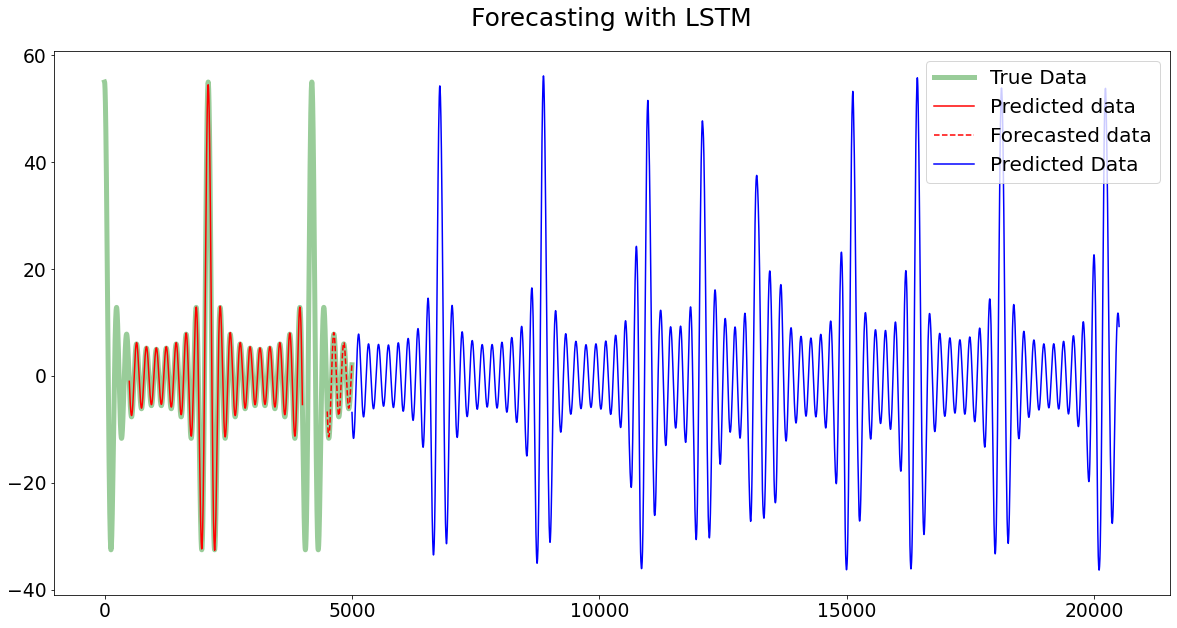

In [ ]:
N = 5000
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
X = np.linspace(0, 15, N)
Y = 10*(np.cos(10*X)) + 9*(np.cos(9*X)) + 8*(np.cos(8*X)) + \
7*(np.cos(7*X)) + 6*(np.cos(6*X)) + 5*(np.cos(5*X)) + 4*(np.cos(4*X)) +\
3*(np.cos(3*X)) + 2*(np.cos(2*X)) + np.cos(X)


dataset = Y.reshape(Y.size, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * (0.8))
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# reshape into X=t and Y=t+1
look_back = 500
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(100, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(100, activation='relu', input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
es = EarlyStopping(monitor='loss', mode = 'min', verbose=1, patience = 20, restore_best_weights=True)
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False, )
model.summary()
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0, callbacks=[es,tqdm_callback])



# make predictions
trainPredict = model.predict(trainX)  
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)

trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset), 'g', linewidth=5, alpha=0.4, label='True Data')
plt.plot(trainPredictPlot, color = 'red', label = 'Predicted data')
plt.plot(testPredictPlot, '--' , color = 'red', label = 'Forecasted data')
plt.legend()
plt.title('Forecasting with LSTM')

##########################################################################################################

#Prediction
    
num_pred = 15000

#Create dataset for network
Input = []
for i in range(0,len(dataset),look_back):
  temp = np.array([])
  for j in range(look_back):
    temp = np.append(temp,float(dataset[i+j]))
  Input.append(temp)

# Network Prediction

x = list(Input[-1])

for i in range(int(num_pred)+1):
  data = np.array(x[i:i+look_back]).reshape(1,1,look_back)
  result = model.predict(data)
  x.append(float(result))

x = np.array(x)
x = np.reshape(x,(x.shape[0],1))
PredictPlot = scaler.inverse_transform(x)
res = np.arange(N,N+len(Y[-look_back:])+num_pred+1)

plt.plot(res, PredictPlot, label = 'Predicted Data', c = 'b')

plt.legend()


plt.show()



(3499, 1, 500)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1, 200)            480800    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 200)            240800    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 842,101
Trainable params: 842,101
Non-trainable params: 0
_________________________________________________________________


Restoring model weights from the end of the best epoch
Epoch 00091: early stopping

Train Score: 0.10 RMSE
Test Score: 0.07 RMSE


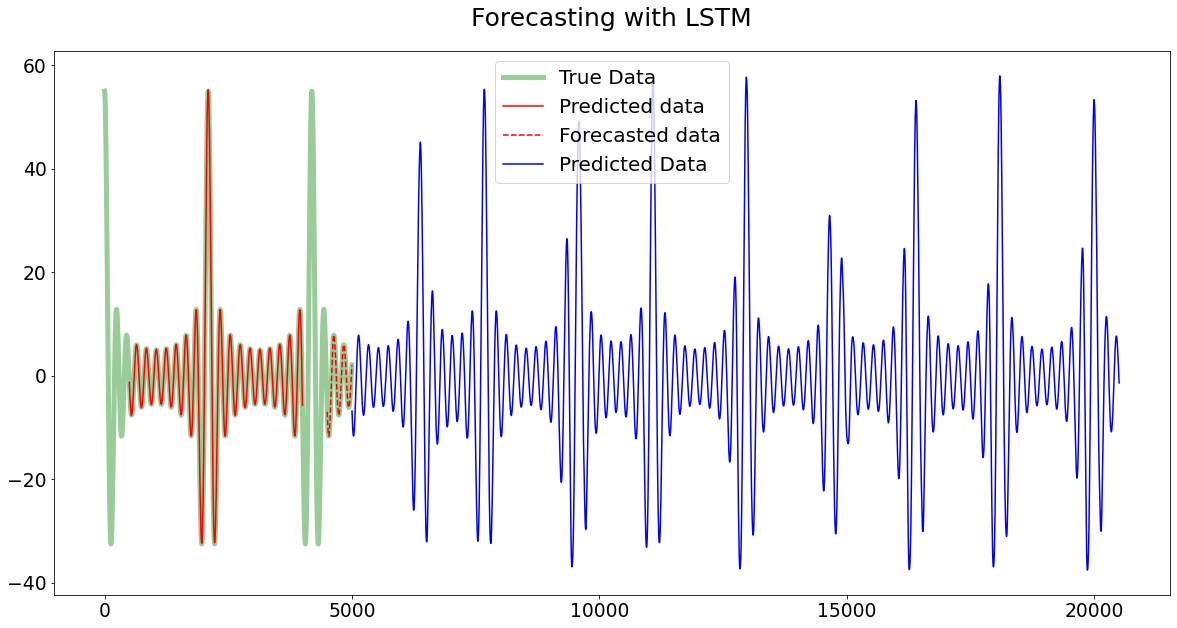

In [ ]:
N = 5000
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
X = np.linspace(0, 15, N)
Y = 10*(np.cos(10*X)) + 9*(np.cos(9*X)) + 8*(np.cos(8*X)) + \
7*(np.cos(7*X)) + 6*(np.cos(6*X)) + 5*(np.cos(5*X)) + 4*(np.cos(4*X)) +\
3*(np.cos(3*X)) + 2*(np.cos(2*X)) + np.cos(X)


dataset = Y.reshape(Y.size, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * (0.8))
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# reshape into X=t and Y=t+1
look_back = 500
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)


# create and fit the LSTM network
keras.backend.clear_session()
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(1, look_back)))
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(1, look_back)))
model.add(LSTM(100, activation='relu', input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
es = EarlyStopping(monitor='loss', mode = 'min', verbose=1, patience = 20, restore_best_weights=True)
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False, )
model.summary()
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0, callbacks=[es,tqdm_callback])



# make predictions
trainPredict = model.predict(trainX)  
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)

trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset), 'g', linewidth=5, alpha=0.4, label='True Data')
plt.plot(trainPredictPlot, color = 'red', label = 'Predicted data')
plt.plot(testPredictPlot, '--' , color = 'red', label = 'Forecasted data')
plt.legend()
plt.title('Forecasting with LSTM')

##########################################################################################################

#Prediction
    
num_pred = 15000

#Create dataset for network
Input = []
for i in range(0,len(dataset),look_back):
  temp = np.array([])
  for j in range(look_back):
    temp = np.append(temp,float(dataset[i+j]))
  Input.append(temp)

# Network Prediction

x = list(Input[-1])

for i in range(int(num_pred)+1):
  data = np.array(x[i:i+look_back]).reshape(1,1,look_back)
  result = model.predict(data)
  x.append(float(result))

x = np.array(x)
x = np.reshape(x,(x.shape[0],1))
PredictPlot = scaler.inverse_transform(x)
res = np.arange(N,N+len(Y[-look_back:])+num_pred+1)

plt.plot(res, PredictPlot, label = 'Predicted Data', c = 'b')

plt.legend()


plt.show()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 199, 64)        33536     
_________________________________________________________________
flatten_1 (Flatten)          (None, 12736)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 12737     
Total params: 46,273
Trainable params: 46,273
Non-trainable params: 0
_________________________________________________________________


Restoring model weights from the end of the best epoch
Epoch 00072: early stopping

Train Score: 0.13 RMSE
Test Score: 0.12 RMSE


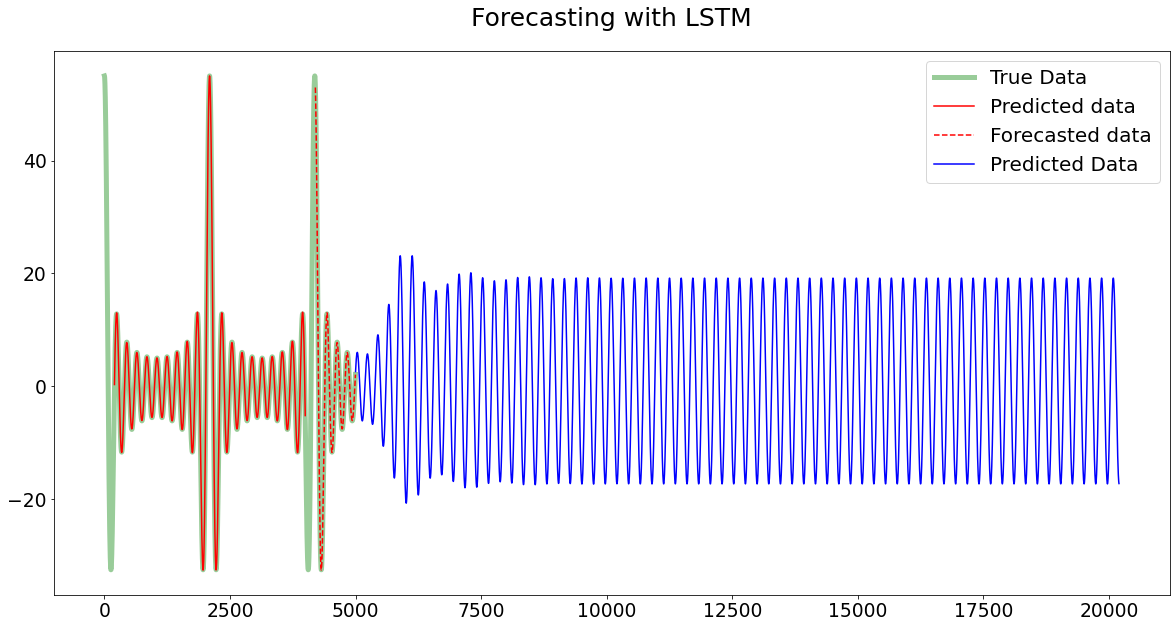

In [75]:
N = 5000
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
X = np.linspace(0, 15, N)
difference = X[1]-X[0]
Y = 10*(np.cos(10*X)) + 9*(np.cos(9*X)) + 8*(np.cos(8*X)) + \
7*(np.cos(7*X)) + 6*(np.cos(6*X)) + 5*(np.cos(5*X)) + 4*(np.cos(4*X)) +\
3*(np.cos(3*X)) + 2*(np.cos(2*X)) + np.cos(X)


dataset = Y.reshape(Y.size, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * (0.8))
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# reshape into X=t and Y=t+1
look_back = 200
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, rows, columns, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, 1, look_back, 1))
testX = np.reshape(testX, (testX.shape[0], 1, 1, look_back, 1))


# create and fit the LSTM network
keras.backend.clear_session()
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(1, 1, look_back, 1)))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
es = EarlyStopping(monitor='loss', mode = 'min', verbose=1, patience = 20, restore_best_weights=True)
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False, )
model.summary()
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0, callbacks=[es,tqdm_callback])


# make predictions
trainPredict = model.predict(trainX)  
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)

trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset), 'g', linewidth=5, alpha=0.4, label='True Data')
plt.plot(trainPredictPlot, color = 'red', label = 'Predicted data')
plt.plot(testPredictPlot, '--' , color = 'red', label = 'Forecasted data')
plt.legend()
plt.title('Forecasting with LSTM')

##########################################################################################################

#Prediction
    
num_pred = 15000

#Create dataset for network
Input = []
for i in range(0,len(dataset),look_back):
  temp = np.array([])
  for j in range(look_back):
    temp = np.append(temp,float(dataset[i+j]))
  Input.append(temp)

# Network Prediction

x = list(Input[-1])

for i in range(int(num_pred)+1):
  data = np.array(x[i:i+look_back])
  data = data.reshape(1,1, 1, look_back, 1)
  result = model.predict(data)
  x.append(float(result))

x = np.array(x)
x = np.reshape(x,(x.shape[0],1))
PredictPlot = scaler.inverse_transform(x)
res = np.arange(N,N+len(Y[-look_back:])+num_pred+1)

plt.plot(res, PredictPlot, label = 'Predicted Data', c = 'b')

plt.legend()


plt.show()

In [ ]:
size = 8
def network(L, sequence_size, N):
  input_data = L
  Data = []
  for i in range(len(L)-sequence_size):
    q = 0
    w = []
    while q<sequence_size:
      w.append(L[i+q])
      q += 1
    Data.append(w)
    
  Target = []
  for i in range(sequence_size,len(L)):
    Target.append(L[i])

  data = np.array(Data, dtype=float)
  target = np.array(Target, dtype=float)
  data = data.reshape(data.shape[0], data.shape[1], 1)

  x_train = data
  y_train = target

  keras.backend.clear_session()
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(sequence_size, 1), return_sequences=True))
  model.add(LSTM(100, activation='relu', input_shape=(sequence_size, 1), return_sequences=True))
  model.add(LSTM(100, activation='relu', input_shape=(sequence_size, 1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  es = EarlyStopping(monitor='loss', mode = 'min', verbose=1, patience = 20, restore_best_weights=True  )

  history = model.fit(x_train, y_train, epochs=6000, verbose=0, callbacks=[es], batch_size = 5)
  
  results = model.predict(x_train)
  w = 0
  while w < N:
    X = [[]]
    q = sequence_size
    while q > 0:
      X[0].append([L[-q]])
      q -= 1
    X = np.array(X)
    results = model.predict(X)
    L.append(float(results))
    w += 1
  print(L)
  plt.scatter(range(len(L)),L, label = "Sequencing of %d elements"%(sequence_size))
  plt.scatter(range(9),L[:9], color = 'black')
  plt.xticks([])
  plt.title("Sequence Prediction using LSTM")
  
  plt.legend()

Restoring model weights from the end of the best epoch
Epoch 00392: early stopping
[10, 20, 30, 40, 50, 60, 70, 80, 90, 99.71495819091797, 109.1924057006836, 118.38611602783203, 127.26567077636719, 135.8130645751953, 144.01959228515625, 151.88369750976562, 159.408935546875, 166.60256958007812, 173.47433471679688, 180.03567504882812, 186.29896545410156]
Restoring model weights from the end of the best epoch
Epoch 00448: early stopping
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100.38699340820312, 110.8946762084961, 121.95108032226562, 133.32098388671875, 145.3709716796875, 157.8984832763672, 171.20733642578125, 185.13453674316406, 199.91685485839844, 215.43275451660156, 231.872314453125, 249.1470184326172]
Restoring model weights from the end of the best epoch
Epoch 00160: early stopping
[10, 20, 30, 40, 50, 60, 70, 80, 90, 102.56102752685547, 115.53223419189453, 129.59991455078125, 146.3571319580078, 164.10646057128906, 183.78091430664062, 206.2692413330078, 230.43646240234375, 257.248077392

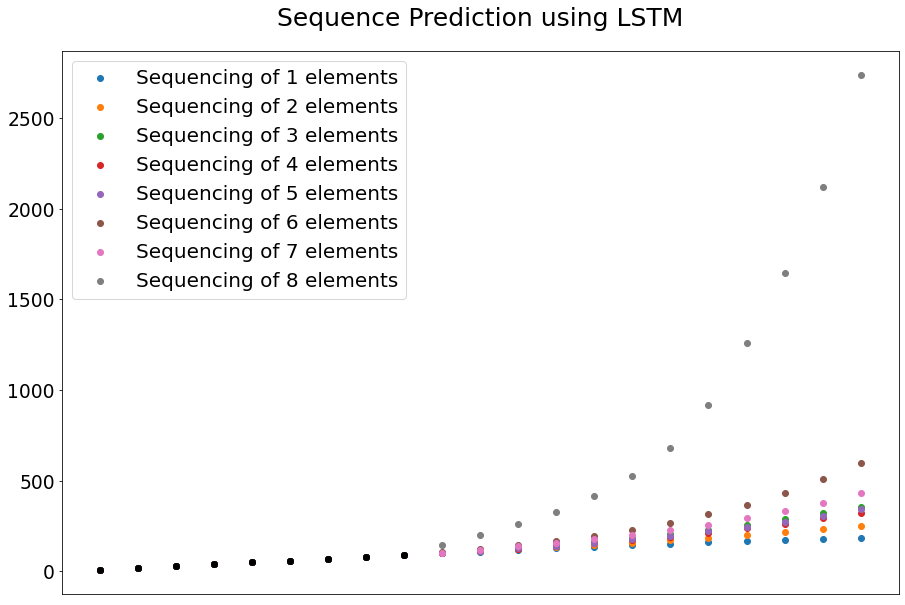

<Figure size 1440x720 with 0 Axes>

In [ ]:
for i in range(1,size+1):
  network([10, 20, 30, 40, 50, 60, 70, 80, 90], i, 12)

plt.figure(figsize=(20,10))
plt.show()